<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/VAE_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Reshape, Conv2DTranspose, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, )
from tensorflow.keras.optimizers import Adam

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
original_dim = 28 * 28
intermediate_dim = 32
latent_dim = 2

In [6]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
mean = layers.Dense(latent_dim)(h)
log_var = layers.Dense(latent_dim)(h)


In [7]:
#We can use these parameters to sample new similar points from the latent space:
#from keras import backend as K

#def sampling(args):
#    z_mean, z_log_sigma = args
#    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim),
#                              mean=0., stddev=0.1)
#    return z_mean + tf.math.exp(z_log_sigma) * epsilon

#z = layers.Lambda(sampling)([z_mean, z_log_sigma])
class Sampling(Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return mean + tf.math.exp(0.5*log_var)*tf.random.normal(shape = (tf.shape(mean)[0], tf.shape(mean)[1]))

In [8]:
#z = layers.Lambda(sampling)([z_mean, z_log_sigma])
#z = sampling([z_mean,z_log_sigma])

z = Sampling()([mean,log_var])

In [9]:
# Create encoder
encoder = keras.Model(inputs, [mean, log_var, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')


In [10]:
vae.compile(optimizer='adam', loss=('mean_squared_error'))

In [11]:
vae.fit(x_train, x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.1205 - val_loss: 0.0615
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0606 - val_loss: 0.0582
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0579 - val_loss: 0.0561
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0560 - val_loss: 0.0545
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0541 - val_loss: 0.0529
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0529 - val_loss: 0.0522
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0520 - val_loss: 0.0517
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0515 - val_loss: 0.0512
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0511 - val_loss: 0.0509
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0508 - val_loss: 0.0504
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0503 - val_loss: 0.0500
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7m

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


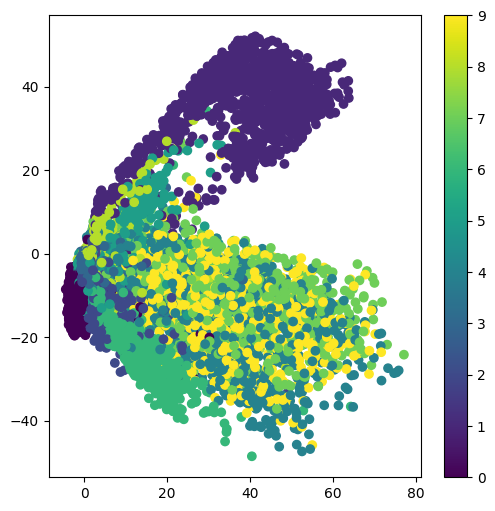

In [15]:
#Because our latent space is two-dimensional, there are a few visualizations that can be done at this point.
#One is to look at the neighborhoods of different classes on the latent 2D plane:

z_test,_,_ = encoder.predict(x_test)


#z,_,_=vae.layers[1].predict(x_train)
plt.figure(figsize=(6,6))
plt.scatter(z_test[:,0],z_test[:,1], c=y_test)
plt.colorbar()
plt.show()


In [26]:
scale=1
n=10

grid_x = np.linspace(-scale,scale,n)
grid_y = np.linspace(-scale,scale,n)

print(grid_x)



[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


In [27]:
print(grid_y)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


[[-1. -1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1, 784)
[[-1.         -0.77777778]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1, 784)
[[-1.         -0.55555556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
(1, 784)
[[-1.         -0.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
(1, 784)
[[-1.         -0.11111111]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(1, 784)
[[-1.          0.11111111]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(1, 784)
[[-1.          0.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(1, 784)
[[-1.          0.55555556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(1, 784)
[[-1.          0.77777778]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 784)
[[-1.  1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
(1, 784)
[[-0.77777778 -1.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
(1, 784)
[[-0.77777778 -0.77777778]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
(1, 784)
[[-0.77777778 -0.55555556]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
(1, 784)
[[-0.77777778 -0.33333333]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

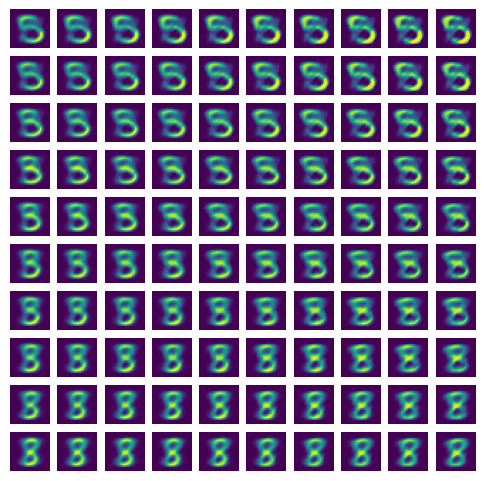

In [29]:
plt.figure(figsize=(6,6))
k=0
for i in grid_x:
  for j in grid_y:
    ax=plt.subplot(n,n,k+1)
    z_sample = np.array([[i, j]])
    print (z_sample)
    x_decoded = decoder.predict(z_sample)
    print (x_decoded.shape)
    digit_picture = x_decoded[0].reshape(28, 28)
    plt.imshow(digit_picture)
    plt.axis('off')
    k+=1